In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
filenames = os.listdir(r'D:\Reserach\Deep Learning\DL Project 4. CIFAR-10 Object Recognition using ResNet50\train')

In [9]:
type(filenames)

list

In [10]:
len(filenames)

50000

In [11]:
print(filenames[0:5])
print(filenames[-5:])

['1.png', '10.png', '100.png', '1000.png', '10000.png']
['9995.png', '9996.png', '9997.png', '9998.png', '9999.png']


Labels Processing

In [12]:
df = pd.read_csv(r'D:\Reserach\Deep Learning\DL Project 4. CIFAR-10 Object Recognition using ResNet50\trainLabels.csv')
df.shape

(50000, 2)

In [13]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [14]:
df[df['id']==7796]


,id,label
7795,7796,frog


In [15]:
df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [16]:
df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [17]:
df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [18]:
df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [19]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels = [labels_dictionary[i] for i in df['label']]

In [20]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


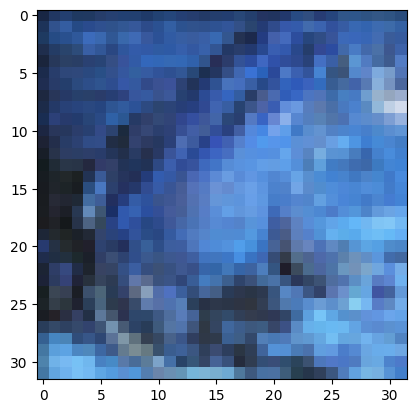

In [21]:
# displaying sample image
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\Reserach\Deep Learning\DL Project 4. CIFAR-10 Object Recognition using ResNet50\train\1032.png')
plt.imshow(img)
plt.show()


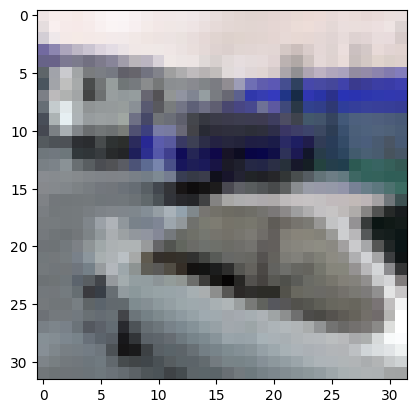

In [22]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\Reserach\Deep Learning\DL Project 4. CIFAR-10 Object Recognition using ResNet50\train\50000.png')
plt.imshow(img)
plt.show()


In [23]:
df[df['id'] == 1032]

,id,label
1031,1032,frog


In [24]:
df[df['id'] == 50000]

,id,label
49999,50000,automobile


In [25]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [26]:
id_list = list(df['id'])

print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [27]:
# convert images to numpy arrays 
train_data_folder = r'D:\Reserach\Deep Learning\DL Project 4. CIFAR-10 Object Recognition using ResNet50\train'
data = []
for id in id_list:
    image_path = os.path.join(train_data_folder, f"{id}.png")
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip missing files
    image = Image.open(image_path)
    image = np.array(image)
    data.append(image)


In [28]:
type(data)
print(len(data))

50000


In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(32, 32, 3)

In [31]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)


In [33]:
type(x)

numpy.ndarray

In [34]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,xtrain.shape,xtest.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [36]:
print(y.shape,ytrain.shape,ytest.shape)

(50000,) (40000,) (10000,)


In [37]:
# scaling the data
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255


In [38]:
xtrain_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [39]:
xtrain[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

Building the Neural Network

In [40]:
import tensorflow as tf

from tensorflow import keras


In [41]:
num_of_classes = 10
# setting up the layers of Nueral Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
    
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the nerual network
model.fit(xtrain_scaled,ytrain,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2185 - loss: 2.1031 - val_acc: 0.3210 - val_loss: 1.8769
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3152 - loss: 1.8813 - val_acc: 0.3332 - val_loss: 1.8275
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.3261 - loss: 1.8435 - val_acc: 0.3223 - val_loss: 1.8316
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3376 - loss: 1.8329 - val_acc: 0.3332 - val_loss: 1.8331
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3475 - loss: 1.8039 - val_acc: 0.3390 - val_loss: 1.8003
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3462 - loss: 1.8047 - val_acc: 0.3587 - val_loss: 1.7809
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3568 - loss: 1.7926 - val_acc: 0.3512 - val_loss: 1.8020
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3575 - loss: 1.7810 - val_acc: 0.3562 - val_loss: 1.7719
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

ResNet50

In [44]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [45]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [1]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping

num_of_classes = 10

# Define the model
model = models.Sequential()

# Upsampling layers to increase the size of the input
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

# Convolutional base should be defined before if not already done
model.add(convolutional_base)

# Flatten the output
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

# Dense layers with regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Final output layer
model.add(layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

# Set up EarlyStopping to avoid unnecessary epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

import cv2
import numpy as np

# Resize images to (256, 256)
xtrain_resized = np.array([cv2.resize(img, (256, 256)) for img in xtrain_scaled])

# Fit the model with resized images
history = model.fit(xtrain_resized, ytrain, 
                    validation_split=0.1, 
                    epochs=10, 
                    batch_size=32, 
                    callbacks=[early_stopping])


NameError: name 'convolutional_base' is not defined

In [ ]:
history = model.fit(xtrain_scaled,ytrain,validation_split=0.1,epochs=10)

In [ ]:
loss , accuracy = model.evaluate(xtest_scaled,ytest)
print('Test Accuracy =', accuracy)